# Данные

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("data/primary.tsv", sep="\t")

In [3]:
df.head(3)

,Ensembl ID,Uniprot IDs,Length,Symbol,Degree,mitochondrion organization,cell adhesion,signal transduction,B cell FPKM,Neuron FPKM
0,ENSG00000000003,A0A087WYV6_HUMAN A0A087WZU5_HUMAN TSN6_HUMAN,15084.0,TSPAN6,5,0,0,0,0.08,19.70
1,ENSG00000000005,TNMD_HUMAN,12883.0,TNMD,1,0,0,0,0.00,0.00
2,ENSG00000000419,H0Y368_HUMAN DPM1_HUMAN Q5QPJ9_HUMAN Q5QPK2_HUMAN,44637.0,DPM1,15,0,0,0,9.55,44.89


In [5]:
new_df = df[(df["Degree"] != 0)]
new_df[["Length", "Degree"]] = np.log10(new_df[["Length", "Degree"]])
new_df[["B cell FPKM", "Neuron FPKM"]] = np.log10(new_df[["B cell FPKM", "Neuron FPKM"]] + 1e-2)

/home/pavel/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [6]:
cols = list(new_df.columns)
cols[2] = "Log10 length"
cols[4] = "Log10 degree"
cols[8] = "B cell log10 FPKM"
cols[9] = "Neuron log10 FPKM"
new_df.columns = cols

In [7]:
df = new_df

# Seaborn - рецепты

In [8]:
import seaborn as sns

## Распределение - sns.distplot

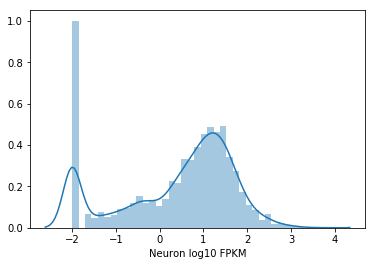

In [9]:
sns.distplot(df["Neuron log10 FPKM"])

## Стиль, палитра

In [10]:
sns.set_style("darkgrid")
sns.set_palette("muted")

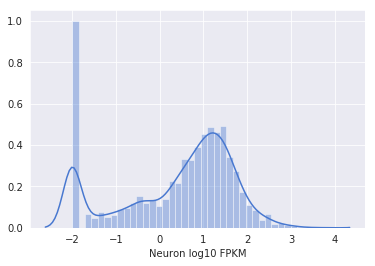

In [11]:
sns.distplot(df["Neuron log10 FPKM"])

![title](matplotlib_seaborn.jpg)

## Глобальные параметры - matplotlib.rcParams

In [12]:
import matplotlib as mpl

In [13]:
width, height = 10, 6
mpl.rcParams['figure.figsize'] = [width, height]

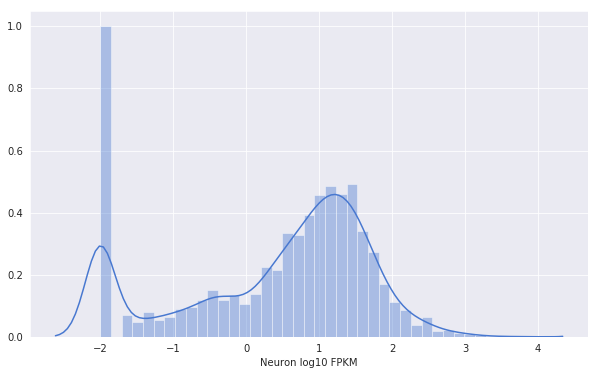

In [14]:
sns.distplot(df["Neuron log10 FPKM"])

## Подписи по осям

NameError: name 'plt' is not defined

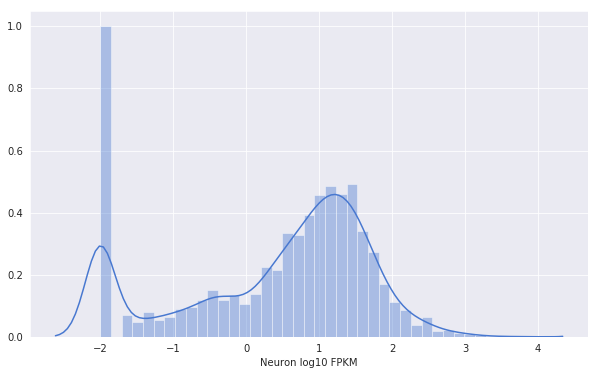

In [15]:
sns.distplot(df["Neuron log10 FPKM"])
plt.title("FPKM distribution", size=18)
plt.xlabel("B cell log10 FPKM", size=15)
plt.ylabel("Density", size=15)

## Отметки по осям

In [16]:
sns.distplot(b_cell_expr_logs)
plt.title("FPKM distribution", size=18)
plt.xticks(size=15)
plt.yticks(size=15)

NameError: name 'b_cell_expr_logs' is not defined

## Совместное распределение - sns.jointplot

In [17]:
width, height = 6, 6
mpl.rcParams['figure.figsize'] = [width, height]

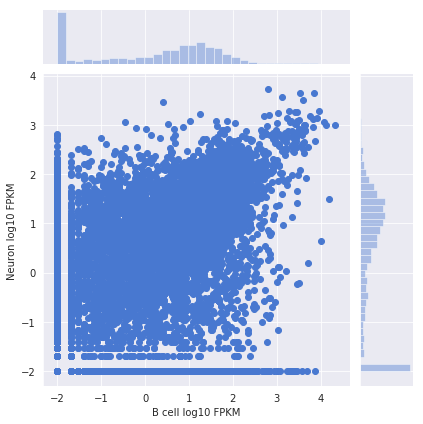

In [18]:
sns.jointplot("B cell log10 FPKM", "Neuron log10 FPKM", 
              data=df, kind="scatter")

## Плотность совместного распределения

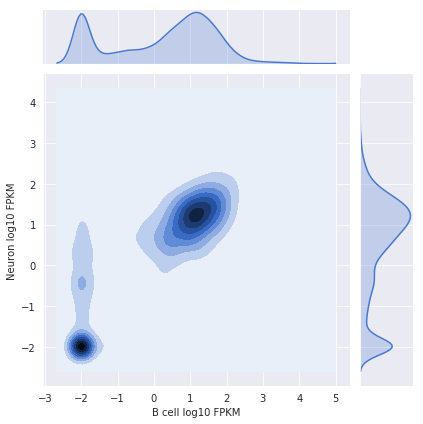

In [19]:
sns.jointplot("B cell log10 FPKM", "Neuron log10 FPKM", data=df, kind="kde") 

## Оптимальный вариант

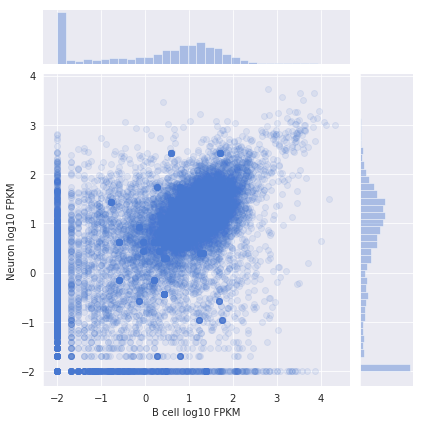

In [20]:
sns.jointplot("B cell log10 FPKM", "Neuron log10 FPKM", data=df, kind="scatter", alpha=0.1) 

## Ящики с усами - sns.boxplot

In [21]:
expr_df = pd.DataFrame()
expr_df["Log10 FPKM"] = pd.concat([df["B cell log10 FPKM"], 
                                   df["Neuron log10 FPKM"]])
expr_df["Cell adhesion"] = pd.concat([df["cell adhesion"], 
                                      df["cell adhesion"]])
expr_df["Cell type"] = ["B cells" for _ in range(len(df))] + ["Neurons" for _ in range(len(df))]

In [20]:
expr_df.sample(3)

,Log10 FPKM,Cell adhesion,Cell type
8355,-2.000000,0,B cells
13268,2.016197,0,Neurons
5047,1.877544,0,Neurons


In [21]:
height, width = 5, 8
sns.set(rc={"figure.figsize": (width, height)})

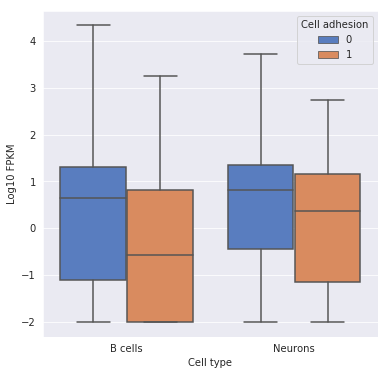

In [22]:
sns.boxplot("Cell type", "Log10 FPKM", hue="Cell adhesion", data=expr_df)

## А если посмотреть на митохондрии?

In [23]:
expr_df = pd.DataFrame()
expr_df["Log10 FPKM"] = pd.concat([df["B cell log10 FPKM"], 
                                   df["Neuron log10 FPKM"]])
expr_df["Mitochondrion organization"] = pd.concat([df["mitochondrion organization"], 
                                      df["mitochondrion organization"]])
expr_df["Cell type"] = ["B cells" for _ in range(len(df))] + ["Neurons" for _ in range(len(df))]

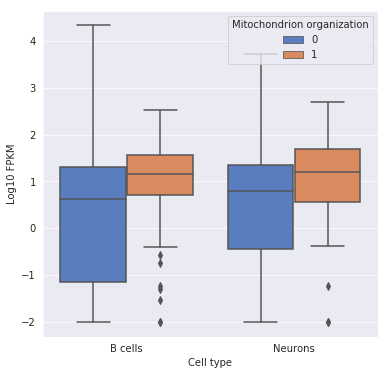

In [24]:
sns.boxplot("Cell type", "Log10 FPKM", hue="Mitochondrion organization", data=expr_df)

## Тепловая карта - sns.heatmap

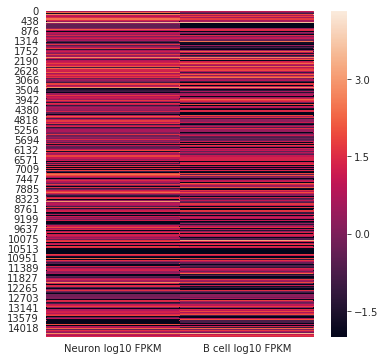

In [25]:
sns.heatmap(df[["Neuron log10 FPKM", "B cell log10 FPKM"]])

## Скластеризованная тепловая карта - sns.clustermap

In [ ]:
sns.clustermap(df[["Neuron log10 FPKM", "B cell log10 FPKM"]], cmap="spring", figsize=(6, 5))

In [53]:
print(df[["Neuron log10 FPKM", "B cell log10 FPKM"]])
print(sum(df[["Neuron log10 FPKM", "B cell log10 FPKM"]]["Neuron log10 FPKM"] == np.nan))
print(sum(df[["Neuron log10 FPKM", "B cell log10 FPKM"]]["B cell log10 FPKM"] == np.nan))


       Neuron log10 FPKM  B cell log10 FPKM
0               1.294687          -1.045757
1              -2.000000          -2.000000
2               1.652246           0.980458
3               0.575188           1.007748
4              -2.000000           2.324015
5              -2.000000          -2.000000
6               0.818226           0.414973
7               0.774517           0.866287
8               1.142389           1.222456
9               1.098644           1.230449
10              1.141450           1.223496
11              1.269279          -2.000000
12             -1.698970          -2.000000
13              1.263873           1.071514
14              2.256092           0.654177
15              1.151982           1.264818
16              0.822822           1.296884
17              1.635986           1.447003
18              1.269513           1.118926
19              1.158965           1.638489
20             -0.886057           1.102091
21             -2.000000        

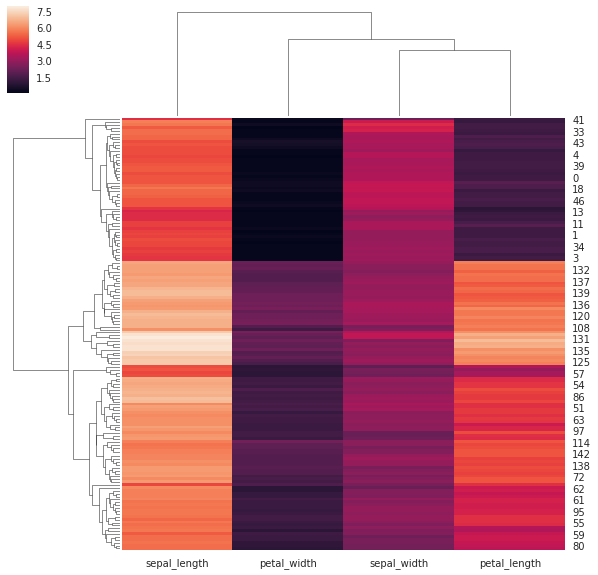

In [28]:
import seaborn as sns; sns.set(color_codes=True)
iris = sns.load_dataset("iris")
species = iris.pop("species")
g = sns.clustermap(iris)

## Когда приходится использовать matplotlib

In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
x = np.arange(200)
sqr_x = x ** 2 / 100

## Легенда

In [31]:
height, width = 4.5, 4.5
sns.set(rc={"figure.figsize": (width, height)})

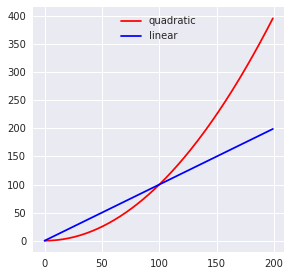

In [32]:
plt.plot(x, sqr_x, color="red")
plt.plot(x, x, color="blue")
plt.legend(["quadratic", "linear"], loc="upper center")

## Ключевые вещи по seaborn и matplotlib

* Seaborn написан на matplotlib
* Seaborn создан для того, чтобы сделать всё хорошо :)
* sns.distplot - распределение
* sns.jointplot - двумерное распределение
* sns.boxplot - ящики с усами
* sns.clustermap - кластеризованная теплокарта
* mpl.rcParams - глобальные параметры отрисовки графиков
* plt.xlabel, plt.ylabel - подписи по осям
* plt.xticks, plt.yticks - отметки по осям
* plt.title - название наверху
* plt.legend - легенда

# Altair

In [59]:
import altair as alt

In [60]:
chart = alt.Chart(df, max_rows=20000)

## Гистограмма

In [61]:
chart.mark_bar().encode(
    x=alt.X("Neuron log10 FPKM:Q", bin=True),
    y=alt.Y("count(*):Q")
)

MaxRowsError: The number of rows in your dataset is greater than the max of 5000

Chart({
  data:             Ensembl ID                                        Uniprot IDs  \
  0      ENSG00000000003       A0A087WYV6_HUMAN A0A087WZU5_HUMAN TSN6_HUMAN   
  1      ENSG00000000005                                         TNMD_HUMAN   
  2      ENSG00000000419  H0Y368_HUMAN DPM1_HUMAN Q5QPJ9_HUMAN Q5QPK2_HUMAN   
  3      ENSG00000000457                           PACE1_HUMAN X6RHX1_HUMAN   
  4      ENSG00000000938                             FGR_HUMAN Q5TGY6_HUMAN   
  5      ENSG00000000971           A0A0D9SG88_HUMAN CFAH_HUMAN Q5TFM2_HUMAN   
  6      ENSG00000001036                           Q7Z6V2_HUMAN FUCO2_HUMAN   
  7      ENSG00000001084  A0A0C4DGB2_HUMAN D6R959_HUMAN D6REX4_HUMAN D6R...   
  8      ENSG00000001167                                         NFYA_HUMAN   
  9      ENSG00000001461              A6NN97_HUMAN H0Y4I9_HUMAN NPAL3_HUMAN   
  10     ENSG00000001497                           LAS1L_HUMAN R4GNF7_HUMAN   
  11     ENSG00000001617  C9IYS6_HUMAN

## Совместное распределение 

In [62]:
alt.Chart(df, max_rows=20000).mark_circle(color="blue", fillOpacity=0.2).encode(
    x=alt.X("Neuron log10 FPKM"),
    y=alt.Y("B cell log10 FPKM"),
)

MaxRowsError: The number of rows in your dataset is greater than the max of 5000

Chart({
  data:             Ensembl ID                                        Uniprot IDs  \
  0      ENSG00000000003       A0A087WYV6_HUMAN A0A087WZU5_HUMAN TSN6_HUMAN   
  1      ENSG00000000005                                         TNMD_HUMAN   
  2      ENSG00000000419  H0Y368_HUMAN DPM1_HUMAN Q5QPJ9_HUMAN Q5QPK2_HUMAN   
  3      ENSG00000000457                           PACE1_HUMAN X6RHX1_HUMAN   
  4      ENSG00000000938                             FGR_HUMAN Q5TGY6_HUMAN   
  5      ENSG00000000971           A0A0D9SG88_HUMAN CFAH_HUMAN Q5TFM2_HUMAN   
  6      ENSG00000001036                           Q7Z6V2_HUMAN FUCO2_HUMAN   
  7      ENSG00000001084  A0A0C4DGB2_HUMAN D6R959_HUMAN D6REX4_HUMAN D6R...   
  8      ENSG00000001167                                         NFYA_HUMAN   
  9      ENSG00000001461              A6NN97_HUMAN H0Y4I9_HUMAN NPAL3_HUMAN   
  10     ENSG00000001497                           LAS1L_HUMAN R4GNF7_HUMAN   
  11     ENSG00000001617  C9IYS6_HUMAN

## Аггрегаторные функции

In [63]:
alt.Chart(df, max_rows=20000).mark_bar(color="blue").encode(
    x=alt.X("Log10 degree:Q", bin=alt.Bin(maxbins=15)),
    y=alt.Y("average(B cell log10 FPKM):Q"),
)

MaxRowsError: The number of rows in your dataset is greater than the max of 5000

Chart({
  data:             Ensembl ID                                        Uniprot IDs  \
  0      ENSG00000000003       A0A087WYV6_HUMAN A0A087WZU5_HUMAN TSN6_HUMAN   
  1      ENSG00000000005                                         TNMD_HUMAN   
  2      ENSG00000000419  H0Y368_HUMAN DPM1_HUMAN Q5QPJ9_HUMAN Q5QPK2_HUMAN   
  3      ENSG00000000457                           PACE1_HUMAN X6RHX1_HUMAN   
  4      ENSG00000000938                             FGR_HUMAN Q5TGY6_HUMAN   
  5      ENSG00000000971           A0A0D9SG88_HUMAN CFAH_HUMAN Q5TFM2_HUMAN   
  6      ENSG00000001036                           Q7Z6V2_HUMAN FUCO2_HUMAN   
  7      ENSG00000001084  A0A0C4DGB2_HUMAN D6R959_HUMAN D6REX4_HUMAN D6R...   
  8      ENSG00000001167                                         NFYA_HUMAN   
  9      ENSG00000001461              A6NN97_HUMAN H0Y4I9_HUMAN NPAL3_HUMAN   
  10     ENSG00000001497                           LAS1L_HUMAN R4GNF7_HUMAN   
  11     ENSG00000001617  C9IYS6_HUMAN

## Размер

In [64]:
alt.Chart(df, max_rows=20000).mark_circle().encode(
    x=alt.X("Log10 degree:Q", bin=alt.Bin(maxbins=15)),
    y=alt.Y("B cell log10 FPKM:Q", bin=alt.Bin(maxbins=40)),
    size=alt.Size("count(*):Q")
)

MaxRowsError: The number of rows in your dataset is greater than the max of 5000

Chart({
  data:             Ensembl ID                                        Uniprot IDs  \
  0      ENSG00000000003       A0A087WYV6_HUMAN A0A087WZU5_HUMAN TSN6_HUMAN   
  1      ENSG00000000005                                         TNMD_HUMAN   
  2      ENSG00000000419  H0Y368_HUMAN DPM1_HUMAN Q5QPJ9_HUMAN Q5QPK2_HUMAN   
  3      ENSG00000000457                           PACE1_HUMAN X6RHX1_HUMAN   
  4      ENSG00000000938                             FGR_HUMAN Q5TGY6_HUMAN   
  5      ENSG00000000971           A0A0D9SG88_HUMAN CFAH_HUMAN Q5TFM2_HUMAN   
  6      ENSG00000001036                           Q7Z6V2_HUMAN FUCO2_HUMAN   
  7      ENSG00000001084  A0A0C4DGB2_HUMAN D6R959_HUMAN D6REX4_HUMAN D6R...   
  8      ENSG00000001167                                         NFYA_HUMAN   
  9      ENSG00000001461              A6NN97_HUMAN H0Y4I9_HUMAN NPAL3_HUMAN   
  10     ENSG00000001497                           LAS1L_HUMAN R4GNF7_HUMAN   
  11     ENSG00000001617  C9IYS6_HUMAN

## Цвет

In [65]:
alt.Chart(df, max_rows=20000).mark_circle().encode(
    x=alt.X("Log10 degree:Q", bin=alt.Bin(maxbins=15)),
    y=alt.Y("B cell log10 FPKM:Q", bin=alt.Bin(maxbins=40)),
    size=alt.Size("count(*):Q"),
    color=alt.Color("average(Neuron log10 FPKM):Q")
)

MaxRowsError: The number of rows in your dataset is greater than the max of 5000

Chart({
  data:             Ensembl ID                                        Uniprot IDs  \
  0      ENSG00000000003       A0A087WYV6_HUMAN A0A087WZU5_HUMAN TSN6_HUMAN   
  1      ENSG00000000005                                         TNMD_HUMAN   
  2      ENSG00000000419  H0Y368_HUMAN DPM1_HUMAN Q5QPJ9_HUMAN Q5QPK2_HUMAN   
  3      ENSG00000000457                           PACE1_HUMAN X6RHX1_HUMAN   
  4      ENSG00000000938                             FGR_HUMAN Q5TGY6_HUMAN   
  5      ENSG00000000971           A0A0D9SG88_HUMAN CFAH_HUMAN Q5TFM2_HUMAN   
  6      ENSG00000001036                           Q7Z6V2_HUMAN FUCO2_HUMAN   
  7      ENSG00000001084  A0A0C4DGB2_HUMAN D6R959_HUMAN D6REX4_HUMAN D6R...   
  8      ENSG00000001167                                         NFYA_HUMAN   
  9      ENSG00000001461              A6NN97_HUMAN H0Y4I9_HUMAN NPAL3_HUMAN   
  10     ENSG00000001497                           LAS1L_HUMAN R4GNF7_HUMAN   
  11     ENSG00000001617  C9IYS6_HUMAN

## Ключевые моменты по Altair

* Основан на графической грамматике vega-lite
* Основной класс - Chart, на вход которому подаётся pd.DataFrame
* Потом с помощью методов Chart можно по-разному визуализировать DataFrame
* Задаёте, чем рисуете (mark.circle, mark_point, mark_bar, etc.)
* Задаёте, что по осям
* Можно задавать различные аггрегаторные функции от столбцов
* Можно задать цвет и размер меток, как такую функцию

# Ключевые моменты вообще

* Seaborn рисует красиво и всё делает за вас, но недостаточно гибкий
* Если можете, используйте seaborn
* Но будущее за библиотеками, основанными на графических грамматиках, как Altair
* Кстати, он тоже всё делает за вас

In [66]:
1	 3463.0
2	 3459.1
3	 3312.6
4	 3306.8
5	 3257.6
6	 3233.6
7	 3097.7
8	 3049.7
9	 3024.9
10	 2994.8
11	 2983.0
12	 2979.4
13	 2566.5
14	 2028.2
15	 2018.8
16	 2012.9
17	 2008.6
18	 2008.3
19	 2005.6
20	 1791.1
21	 1723.3
22	 1718.5
23	 1689.3
24	 1686.0
25	 1588.6
26	 1545.8
27	 1525.3
28	 1339.2
29	 1177.0
30	  324.7
31	 -401.0
32	 -500.4
33	 -510.4
34	 -521.2
35	 -522.5
36	 -523.9
37	 -524.3
38	 -525.0
39	 -525.0
40	 -539.7
41	 -539.8
42	 -549.5
43	 -549.6
44	 -550.8
45	 -590.9
46	 -595.0
47	 -598.8
48	 -601.8
49	 -602.9
50	 -618.8
51	 -619.8
52	 -627.5
53	 -640.0
54	 -645.0
55	 -645.4


SyntaxError: invalid syntax (<ipython-input-66-d51099504b56>, line 1)